In [1]:
import json
import numpy as np
from google.colab import drive
drive.mount('/drive')

x_train = np.load('/drive/My Drive/salary/inputs.npy')
y_train = np.load('/drive/My Drive/salary/outputs.npy')


import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt


# Model
class myModel(object):
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(10.0)
        
    def __call__(self, x):
        return self.W * x + self.b


model = myModel()

# Loss
def loss(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))


def plot_history(history):
    plt.plot(history.history['loss'], 
            label='Средняя ошибка на обучающем наборе')
    plt.plot(history.history['val_loss'], 
            label='Средняя ошибка на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Средняя ошибка')
    plt.legend()
    plt.show()


print('Current loss: %1.6f' % loss(model(x_train), y_train).numpy())

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
Current loss: 64.425949


Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 37.2664 - mae: 4.8913 - val_loss: 25.1354 - val_mae: 3.8966
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 34.1283 - mae: 4.6783 - val_loss: 22.9913 - val_mae: 3.7389
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 31.0608 - mae: 4.4660 - val_loss: 20.9583 - val_mae: 3.5816
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 28.1342 - mae: 4.2476 - val_loss: 18.9563 - val_mae: 3.4175
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 25.2844 - mae: 4.0252 - val_loss: 17.0200 - val_mae: 3.2499
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 22.6002 - mae: 3.8003 - val_loss: 15.1426 - val_mae: 3.0783
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 19.9844 - mae: 3.5741 - val_loss: 13.4089 - val_mae: 2.9120
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 17.5

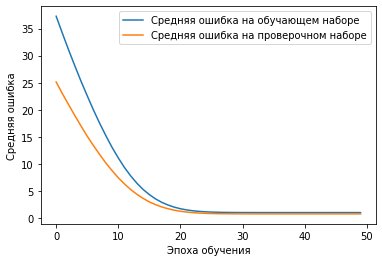

In [2]:
model = Sequential()
model.add(Dense(10, input_dim=1, activation='linear'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=50, 
                    validation_split=0.05, 
                    verbose=1)

plot_history(history)

In [3]:
pred = model.predict([1, 2, 3, 4, 5])
pred = np.around(pred)
pred

array([[ 8.],
       [14.],
       [20.],
       [26.],
       [32.]], dtype=float32)

In [4]:
answer = {"answer":pred[:,0].astype(str).tolist()}
jsonStr = json.dumps(answer)
print(jsonStr)

{"answer": ["8.0", "14.0", "20.0", "26.0", "32.0"]}
